<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Workshop_5/Jupyter-notebooks/2-6factor-more_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the four-Factor Full Factorial Design

## Task 1, lab session

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *


**fetstil** ## Two-Level Four-Factor Full Factorial Design
Taking the data from te file 

In [15]:
#Defining parameters and high and low levels. Putting in pd.DataFrame

# create dictionary for parameters
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Pressure',
                 'C' : 'Mole ratio',
                 'D' : 'String rate'}

#create list of data for high and low. 
dat = [('A',20,40),
        ('B',1,1.2),
       ('C',0.3,0.6),
       ('D',1000,1300)]

#creating the dataframe
inputs_df = pd.DataFrame(dat,columns = ['index', 'low', 'high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

#print dataframe
inputs_df


,low,high,label
index,,,
A,20.0,40.0,Temperature
B,1.0,1.2,Pressure
C,0.3,0.6,Mole ratio
D,1000.0,1300.0,String rate


In [16]:
#Encoding the variable values and getting the average and the span

# compute averages and span
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

# encode the data
inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,20.0,40.0,Temperature,-1.0,1.0
B,1.0,1.2,Pressure,-1.0,1.0
C,0.3,0.6,Mole ratio,-1.0,1.0
D,1000.0,1300.0,String rate,-1.0,1.0


In [20]:
# Making a list that has the 2^4 encoding only
import itertools

# Create the inputs:
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1],[-1,1]) )

encoded_inputs


[(-1, -1, -1, -1),
 (-1, -1, -1, 1),
 (-1, -1, 1, -1),
 (-1, -1, 1, 1),
 (-1, 1, -1, -1),
 (-1, 1, -1, 1),
 (-1, 1, 1, -1),
 (-1, 1, 1, 1),
 (1, -1, -1, -1),
 (1, -1, -1, 1),
 (1, -1, 1, -1),
 (1, -1, 1, 1),
 (1, 1, -1, -1),
 (1, 1, -1, 1),
 (1, 1, 1, -1),
 (1, 1, 1, 1)]

In [ ]:
#creating a dataframe with only the indexes for each variable and the encoded inputs
results=pd.DataFrame(encoded_inputs)
results=results[results.columns[::-1]]
results.columns=['A','B','C','D']
results


In [54]:
# Now we add the data to the thing
doe = pd.read_csv('Ex6-2.csv')
y =pd.Series.tolist(doe['Rate'])
results['y'] = y
results

,A,B,C,D,y
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,71
2,-1,1,-1,-1,48
3,1,1,-1,-1,65
4,-1,-1,1,-1,68
5,1,-1,1,-1,60
6,-1,1,1,-1,80
7,1,1,1,-1,65
8,-1,-1,-1,1,43
9,1,-1,-1,1,100


In [35]:
# Compute the mean effect of the factor on the response,
# conditioned on each variable
labels = ['A','B','C','D']

main_effects = {}

print('main effects')
for key in labels:
        average_effects = results.groupby(key)['y'].mean()
        main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(main_effects)

main effects
{'A': 21.625, 'B': 3.125, 'C': 9.875, 'D': 14.625}


In [40]:
# Adding the twoway interactions
twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:
    
    effects = results.groupby([key[0],key[1]])['y'].mean()
    
    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('A', 'B'): 0.125,
 ('A', 'C'): -18.125,
 ('A', 'D'): 16.625,
 ('B', 'C'): 2.375,
 ('B', 'D'): -0.375,
 ('C', 'D'): -1.125}

In [41]:
# Adding the threeway interactions
threeway_labels = list(itertools.combinations(labels, 3))

threeway_effects = {}
for key in threeway_labels:
    
    effects = results.groupby([key[0],key[1],key[2]])['y'].mean()
    
    threeway_effects[key] = sum([ i*j*k*effects[i][j][k]/4 for i in [-1,1] for j in [-1,1] for k in [-1,1] ])

threeway_effects

{('A', 'B', 'C'): 1.875,
 ('A', 'B', 'D'): 4.125,
 ('A', 'C', 'D'): -1.625,
 ('B', 'C', 'D'): -2.625}

In [42]:
# Adding the fourway interactions
fourway_labels = list(itertools.combinations(labels, 4))

fourway_effects = {}
for key in fourway_labels:
    
    effects = results.groupby([key[0],key[1],key[2],key[3]])['y'].mean()
    
    fourway_effects[key] = sum([ i*j*k*l*effects[i][j][k][l]/8 for i in [-1,1] for j in [-1,1] for k in [-1,1] for l in [-1,1] ])

fourway_effects

{('A', 'B', 'C', 'D'): 1.375}

In [50]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(main_effects.keys()):
    effects.append(abs(main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects.append(abs(threeway_effects[k]))
    indexes.append(k)  
for i,k in enumerate(fourway_effects.keys()):
    effects.append(abs(fourway_effects[k]))
    indexes.append(k)        
    
effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
A,21.625,21.71
"(A, C)",18.125,39.90
"(A, D)",16.625,56.59
D,14.625,71.27
C,9.875,81.18
"(A, B, D)",4.125,85.32
B,3.125,88.46
"(B, C, D)",2.625,91.09
"(B, C)",2.375,93.48
"(A, B, C)",1.875,95.36


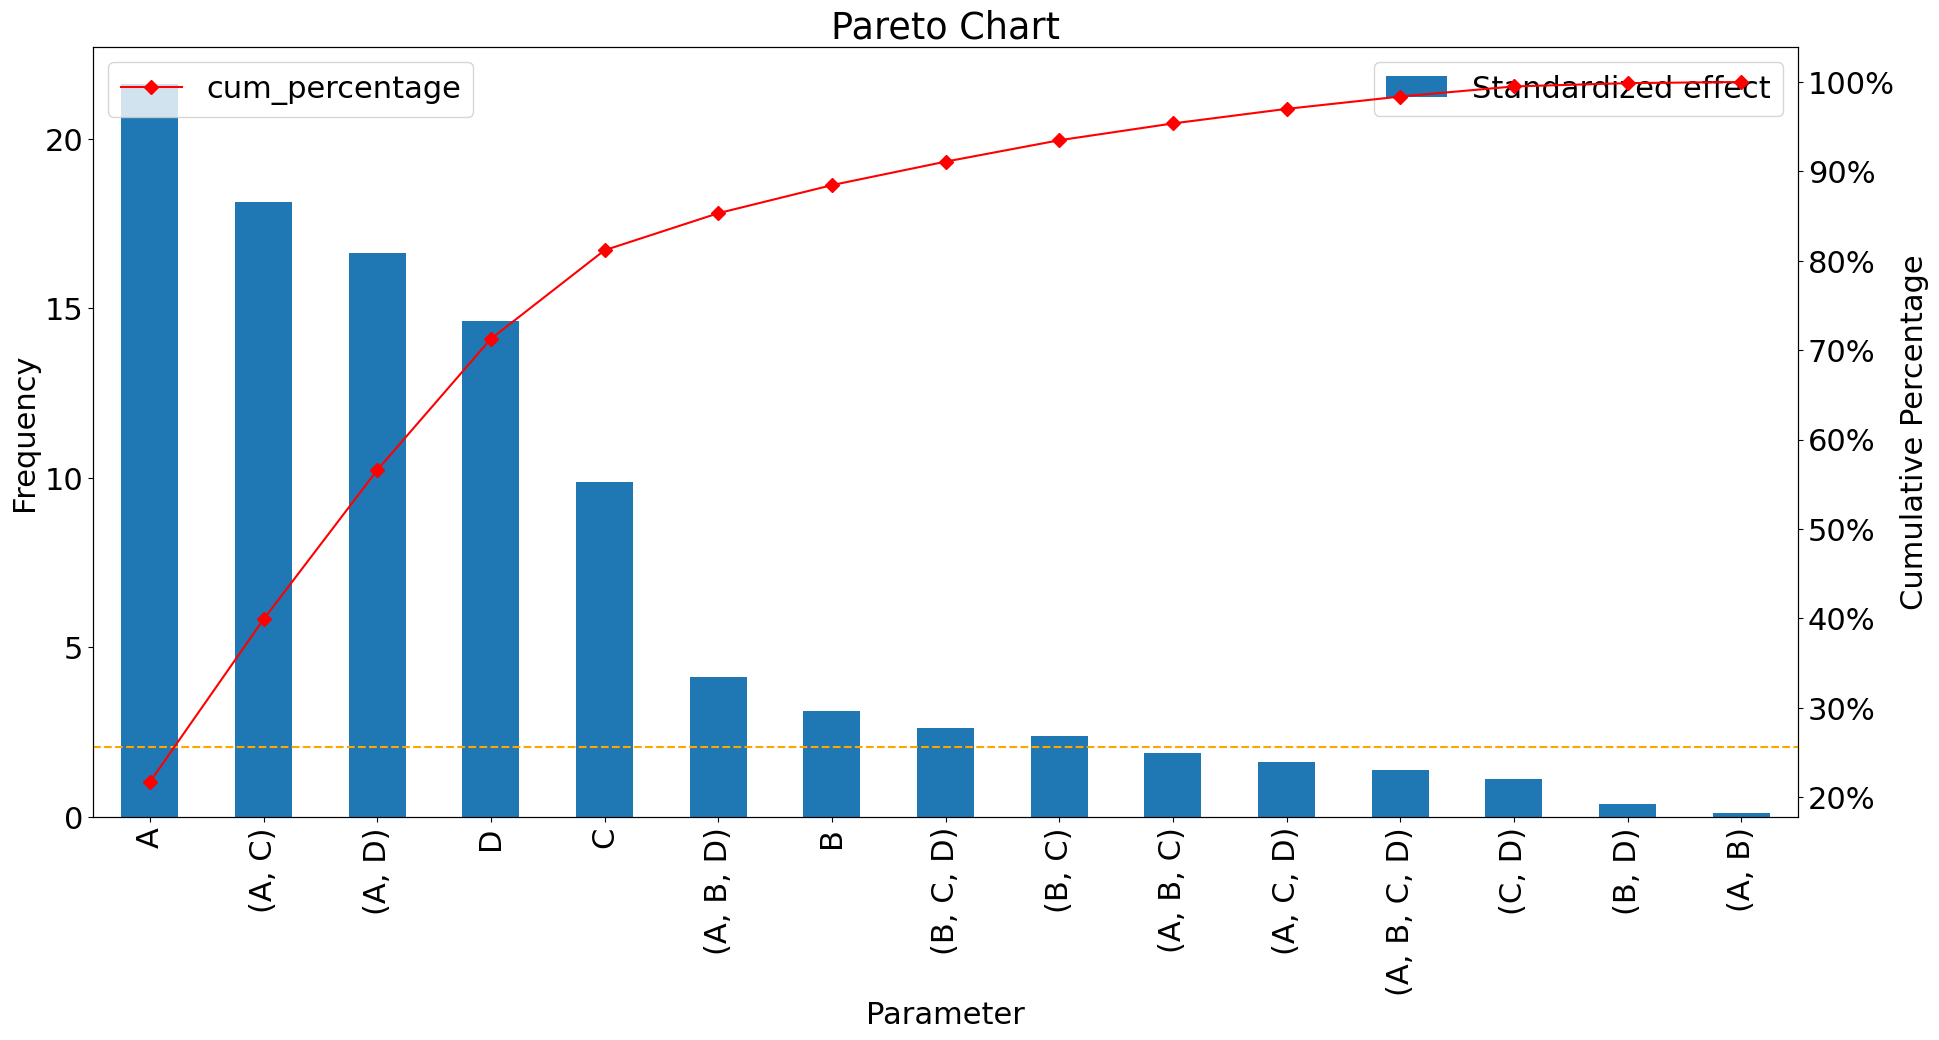

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({'font.size': 22})
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.set_title("Pareto Chart")
ax.set_xlabel("Parameter")
ax.set_ylabel("Frequency");
effects_df.plot.bar(y='Standardized effect', ax=ax)
ax.axhline(2.06, color="orange", linestyle="dashed")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
#ax2.plot(effects_df.index, effects_df["cum_percentage"], color="red", marker="D", ms=7)
effects_df.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [51]:
#making the thing without the abs - for a reasonable QQ
effects2=[] #pd.DataFrame({})
indexes2=[]
for i,k in enumerate(main_effects.keys()):
    effects2.append(main_effects[k])
    indexes2.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects2.append(twoway_effects[k])
    indexes2.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects2.append(threeway_effects[k])
    indexes2.append(k)  
for i,k in enumerate(fourway_effects.keys()):
    effects2.append(fourway_effects[k])
    indexes2.append(k)        
    
effects_df2=pd.DataFrame({"Standardized effect":effects2})

# reset the indexes
effects_df2.index=indexes2
# Sort values in descending order
effects_df2 = effects_df2.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df2["cum_percentage"] = round(effects_df2["Standardized effect"].cumsum()/effects_df2["Standardized effect"].sum()*100,2)

# Display data frame
effects_df2

,Standardized effect,cum_percentage
A,21.625,41.69
"(A, D)",16.625,73.73
D,14.625,101.93
C,9.875,120.96
"(A, B, D)",4.125,128.92
B,3.125,134.94
"(B, C)",2.375,139.52
"(A, B, C)",1.875,143.13
"(A, B, C, D)",1.375,145.78
"(A, B)",0.125,146.02


(array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
        -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
         0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
 array([-18.125,  -2.625,  -1.625,  -1.125,  -0.375,   0.125,   1.375,
          1.875,   2.375,   3.125,   4.125,   9.875,  14.625,  16.625,
         21.625]))

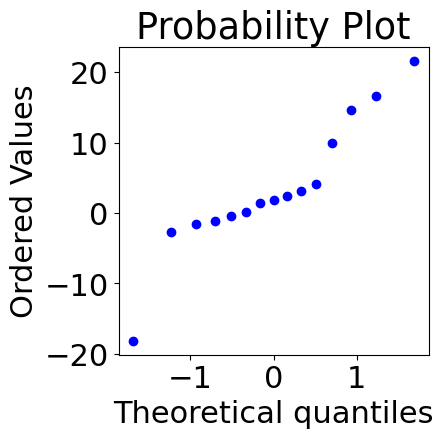

In [53]:
from matplotlib.pyplot import *
import scipy.stats as stats
import statsmodels.api as sm
fig = figure(figsize=(4,4))


stats.probplot(effects_df2["Standardized effect"], dist="norm", plot=plt, fit=False)

#sm.qqplot(effects_df["Standardized effect"],line ='45')

## Utilizing Degrees of Freedom
Our goal is to use least squares to compute model equations for  (y$_1$)
  as a function of  (A,C,D,(A,C),(A,D))
 .

In [55]:
xlabs = ['A','C','D']
ylabs = ['y']
ls_data = results[xlabs+ylabs]

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

x = ls_data[xlabs]
x = sm.add_constant(x)

## Ordinary Least Squares Regression Model
This built-in OLS model will fit an input vector  (A,C,D,(A,C),(A,D))
  to an output vector  (y)
  using a linear model

In [57]:
y = ls_data['y']
est1 = sm.OLS(y,x).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     4.767
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0206
Time:                        13:44:17   Log-Likelihood:                -63.474
No. Observations:                  16   AIC:                             134.9
Df Residuals:                      12   BIC:                             138.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0625      3.690     18.985      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The StatsModel OLS object prints out quite a bit of useful information, in a nicely-formatted table. Starting at the top, we see a couple of important pieces of information: specifically, the name of the dependent variable (the response) that we're looking at, the number of observations, and the number of degrees of freedom.

We can see an  R$^2$ statistic, which indicates how well this data is fit with our linear model, and an adjusted R$^2$
  statistic, which accounts for the large nubmer of degrees of freedom. While an adjusted R$^2$
  of 0.565 is not great, we have to remember that this linear model is trying to capture a wealth of complexity in six coefficients. Furthermore, the adjusted  R$^2$
  value is too broad to sum up how good our model actually is.

The table in the middle is where the most useful information is located. The coef column shows the coefficients  a$_0$,a$_1$,a$_2$,…
  for the model equation:
\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3+x_3+a_4x_4+a_5x_5+a_6x_6
\end{equation}
 
Using the extra degrees of freedom, an estime s$^2$
  of the variance in the regression coefficients is also computed, and reported in the the std err column. Each linear term is attributed the same amount of variance,  ±0.24
 .

In [64]:
#Contains the relevant second order versions selected from the QQ-plot
est2 = smf.ols(formula='y~ A + C + D + A:C + A:D',data=results).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     56.74
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.14e-07
Time:                        13:51:22   Log-Likelihood:                -42.711
No. Observations:                  16   AIC:                             97.42
Df Residuals:                      10   BIC:                             102.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0625      1.104     63.444      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Quantifying Model Goodness-of-Fit


Text(0.5, 1.0, 'Res, y, wih cross')

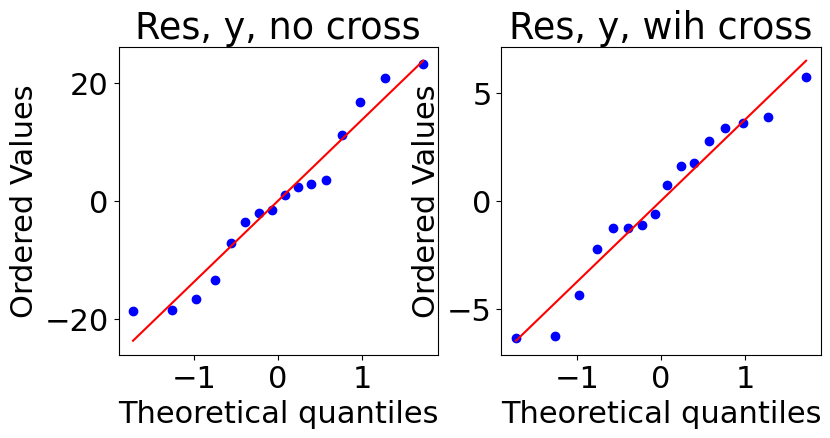

In [70]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

# Quantify goodness of fit

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

r = y - est1.predict(x)
r_cross = y - est2.predict(x)

stats.probplot(r, dist="norm", plot=ax1)
stats.probplot(r_cross, dist="norm", plot=ax2)
ax1.set_title('Res, y, no cross')
ax2.set_title('Res, y, wih cross')

## Distribution of Error


Text(0.5, 1.0, 'Normalized Residual Error, y_cross')

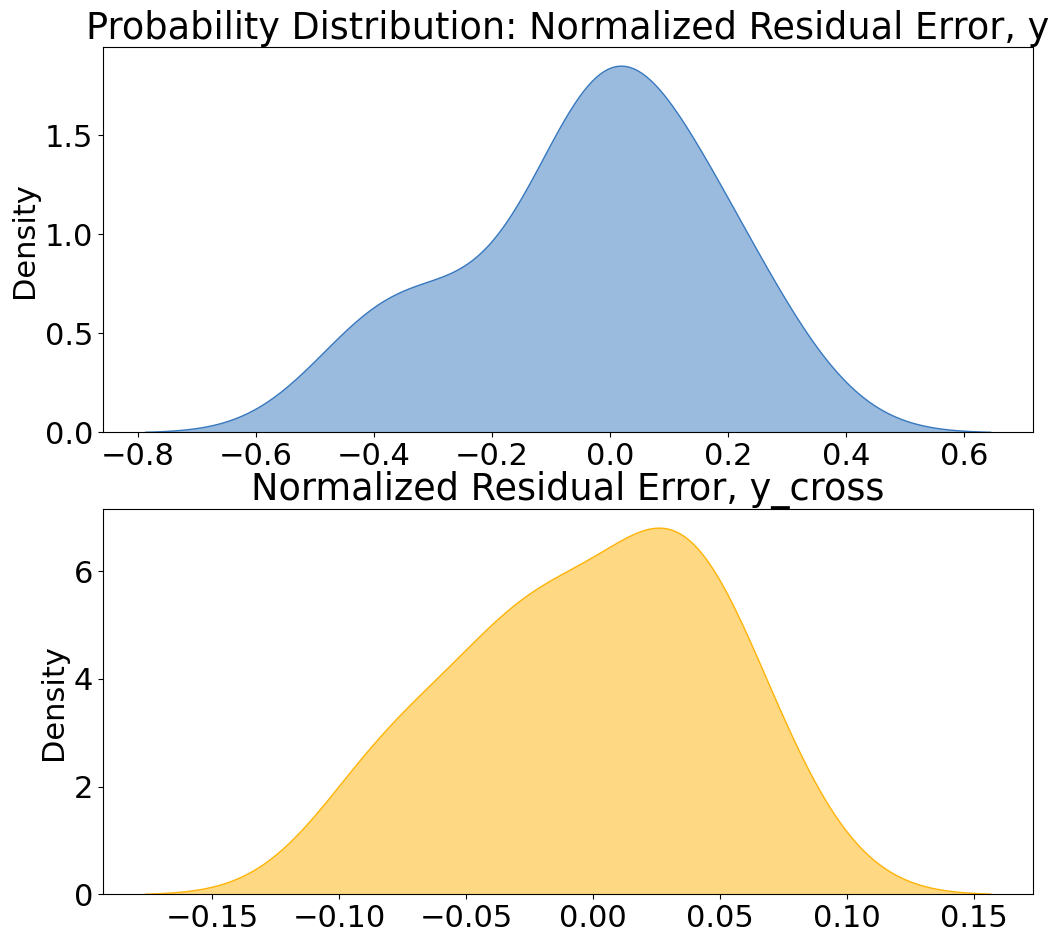

In [76]:
import warnings
warnings.filterwarnings("ignore")

fig = figure(figsize=(12,17))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
axes = [ax1,ax2]

colors = sns.xkcd_palette(["windows blue", "amber", "faded green", "dusty purple","aqua blue"])

normed_resids = [r/y, r_cross/y]

for (dataa, axx, colorr) in zip(normed_resids,axes,colors):
    sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);

ax1.set_title('Probability Distribution: Normalized Residual Error, y')
ax2.set_title('Normalized Residual Error, y_cross')